In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import time

## 2d bond percolation

In [128]:
# square lattice
l = 2

def does_percolate_periodic(r,loss_inds):
    r1 = r
    r2 = r
    Gy = nx.Graph()
    Gy.add_nodes_from(np.arange(r1*(r2+1)))
    Gx = nx.Graph()
    Gx.add_nodes_from(np.arange((r1+1)*r2))

    for i2 in range(r2):
        for i1 in range(r1):
            ind1 = i2*r1+ i1
            ind2 = i2*r1 + ((i1+1)%r1)
            # cylinder along y
            if 2*ind1 in loss_inds:
                Gy.add_edge(ind1,ind2)
                if i2 ==0:
                    Gy.add_edge(r1*r2+ind1,r1*r2+ind2)
            if 2*ind1+1 in loss_inds:
                Gy.add_edge(ind1,ind1+r1)

            # cylinder along x
            ind2 = ((i2+1)%r2)*r1 + i1
            i2_g = ((i2+1)%r2)*(r1+1) + i1
            i1_g = i2*(r1+1)+ i1
            if 2*ind1+1 in loss_inds:
                Gx.add_edge(i1_g,i2_g)
                if i1 == 0 :
                    Gx.add_edge(i1_g+r1,i2_g+r1) 
            if 2*ind1 in loss_inds:
                Gx.add_edge(i1_g,i1_g+1)
                

    first_row = np.arange(r1)
    last_row = np.arange(r2*r1,(r2+1)*r1)
    path_y = 0
    for i_first in first_row:
        for i_last in last_row:
            if nx.has_path(Gy,i_first,i_last):
                if (i_first - i_last )%r1 ==0:
                    path_y = 1
                    break

    first_col = np.arange(0,(r2-1)*(r1+1)+1,r1+1)
    last_col = np.arange(r1,r2*(r1+1)+1,r1+1)
    path_x = 0
    for i_first in first_col:
        for i_last in last_col:
            if nx.has_path(Gx,i_first,i_last):
                if int(i_first/(r1+1)) == int(i_last/(r1+1)):
                    path_x = 1
                    break
                    
    return path_x, path_y

def does_percolate_obc(r,loss_inds):
    r1 = r
    r2 = r
    G = nx.Graph()
    G.add_nodes_from(range(r1*r2))
    
    for i2 in range(r2-1):
        for i1 in range(r1-1):
            ind1 = i2*r1+ i1
            ind2 = i2*r1 + i1+1
            #  along x
            if 2*ind1 in loss_inds:
                G.add_edge(ind1,ind2)
            #  along y
            ind2 = (i2+1)*r1 + i1
            if 2*ind1+1 in loss_inds:
                G.add_edge(ind1,ind2)
    for i2 in range(r2-1):
        ind1 = i2*r1+ r1 -1 
        ind2 = (i2+1)*r1 + r1 -1
        # along y
        if 2*ind1+1 in loss_inds:
            G.add_edge(ind1,ind2)
    for i1 in range(r1-1):
        ind1 = (r2-1)*r1+ i1
        ind2 = (r2-1)*r1 + i1+1
        #  along x
        if 2*ind1 in loss_inds:
            G.add_edge(ind1,ind2)

    first_row = np.arange(r1)
    last_row = np.arange((r2-1)*r1,r2*r1)
    path_y = 0
    for i_first in first_row:
        for i_last in last_row:
            if nx.has_path(G,i_first,i_last):
                # if 2*i_last+1 in loss_inds or (i_first - i_last )%r1 ==0:
                path_y = 1
                break

    first_col = np.arange(0,(r2-1)*r1+1,r1)
    last_col = np.arange(r1-1,r2*r1+1,r1)
    path_x = 0
    for i_first in first_col:
        for i_last in last_col:
            if nx.has_path(G,i_first,i_last):
                # if 2*i_last in loss_inds or int(i_first/r1) == int(i_last/r1):
                path_x = 1
                break

    return path_x, path_y

def does_percolate_nn(r,loss_inds,loss_inds_nn):
    r1 = r
    r2 = r    
    Gy = nx.Graph()
    Gy.add_nodes_from(range(r1*(r2+2)))

    # for i in np.arange(r1*(r2+2)):
    #     Gy.add_node(i, pos = (i%r1, int(i/r1)))
   
    for i2 in range(r2):
        for i1 in range(r1):
            ind1 = i2*r1+ i1
            ind2 = i2*r1 + ((i1+1)%r1)
            # cylinder along y
            if 2*ind1 in loss_inds:
                Gy.add_edge(ind1,ind2)
                if i2 ==0:
                    Gy.add_edge(r1*r2+ind1,r1*r2+ind2)
            if 2*ind1+1 in loss_inds:
                Gy.add_edge(ind1,ind1+r1)
                if i2 ==0:
                    Gy.add_edge(r1*r2+ind1,r1*r2+ind1+r1)

            ind1 = i2*r1+ i1
            ind2 = i2*r1 + ((i1+2)%r1)
            # cylinder along y
            if 2*ind1 in loss_inds_nn:
                Gy.add_edge(ind1,ind2)
                if i2 ==0 or i2 ==1:
                    Gy.add_edge(r1*r2+ind1,r1*r2+ind2)
            if 2*ind1+1 in loss_inds_nn and i2< r2:
                Gy.add_edge(ind1,ind1+2*r1)
                
    first_row = np.arange(r1)
    # last_row = np.arange(r2*r1,(r2+1)*r1)
    path_y = 0
    for i_first in first_row:
        # for i_last in last_row:
        if nx.has_path(Gy,i_first,r2*r1+i_first):
            # if (i_first - i_last )%r1 ==0:
            path_y = 1
            break
                    
    first_row = r1+np.arange(r1)
    # last_row = r1+np.arange(r2*r1,(r2+1)*r1)
    for i_first in first_row:
        # for i_last in last_row:
        if nx.has_path(Gy,i_first,r2*r1+i_first):
            # if (i_first - i_last )%r1 ==0:
            path_y = 1
            break
                   
    return path_y

    

In [166]:
p_list = np.linspace(0,0.8,10)
L_list = np.arange(3,7,1)
Nrep = 400
prob_x = np.zeros((len(L_list),len(p_list)))
prob_y = np.zeros((len(L_list),len(p_list)))
tic = time.time()
for i_L, L in enumerate(L_list):
    print(L)
    for i_r in range(Nrep):
        for i_p, prob_l in enumerate(p_list):
            # loss error
            prob_l_nn = 0*prob_l
            # prob_l = 0
            # error_loss = np.random.rand(l* (L**2)) 
            # loss_inds = np.argwhere(error_loss < prob_l)[:,0]
            error_loss_x = np.random.rand((L**2)) 
            p_x = (1-(1-2*prob_l)**5)/2
            loss_inds_x = 2*np.argwhere(error_loss_x < p_x)[:,0]
            error_loss_y = np.random.rand((L**2)) 
            p_y = prob_l
            loss_inds_y = 2*np.argwhere(error_loss_y < p_y)[:,0] + 1
            loss_inds = np.sort(np.concatenate((loss_inds_x,loss_inds_y)))
            # error_loss = np.random.rand(l* (L**2)) 
            # loss_inds = np.argwhere(error_loss < prob_l)[:,0]
            # remain_inds = np.argwhere(error_loss >= prob_l)[:,0]
            
            error_loss_nn = np.random.rand(l* (L**2)) 
            loss_inds_nn = np.argwhere(error_loss_nn < prob_l_nn)[:,0]

            # px, py = does_percolate_obc(L,loss_inds)
            # px, py = does_percolate_periodic(L,loss_inds)
            py = does_percolate_nn(L,loss_inds,loss_inds_nn)
            # prob[i_L,i_p] += ((px+py)>0)
            # prob_x[i_L,i_p] += px
            prob_y[i_L,i_p] += py
toc = time.time()
print("time = ", toc-tic, "secs")
prob_x /= Nrep
prob_y /= Nrep

3
4
5
6
time =  16.38541078567505 secs


In [162]:
print(loss_inds)

[ 3  4  5  7  8  9 10 12 13 14 15 16 19 21 22 23 24 25 26 28 29 30 31 35
 36 37 38 40 42 43 44 46 47 48 52 55 56 57 58 59 60 62 64 66 70 71]


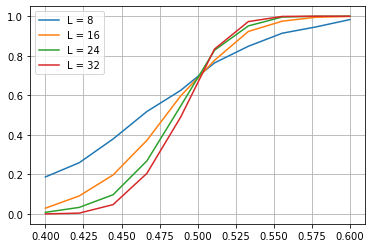

In [42]:
plt.figure()
for i_L, L in enumerate(L_list):
    plt.plot(p_list,prob[i_L,:],"-", label="L = %d" % L)
# plt.yscale("log")
plt.grid()
plt.legend()
plt.show()

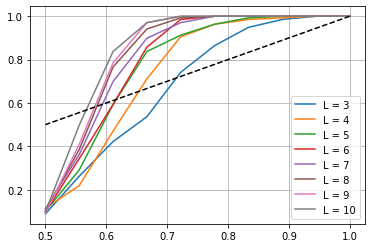

In [159]:
plt.figure()
for i_L, L in enumerate(L_list):
    plt.plot(1-p_list,(1-prob_y[i_L,:])**3,"-", color = "C%d" % i_L, label="L = %d" % L)
    # plt.plot(p_list,prob_x[i_L,:],"--", color = "C%d" % i_L)
    
plt.plot(1-p_list,1-p_list,"k--")
plt.legend()
plt.grid()
plt.show()

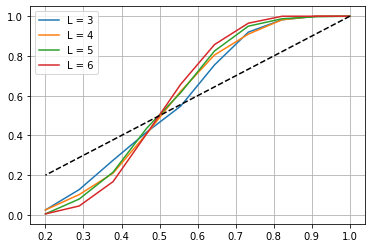

In [165]:
plt.figure()
for i_L, L in enumerate(L_list):
    plt.plot(1-p_list,(1-prob_y[i_L,:]),"-", color = "C%d" % i_L, label="L = %d" % L)
    
plt.plot(1-p_list,1-p_list,"k--")
plt.legend()
plt.grid()
plt.show()

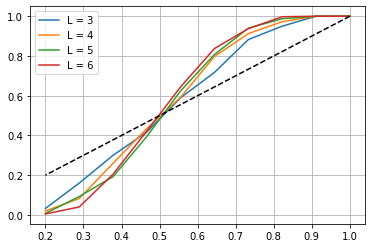

In [167]:
plt.figure()
for i_L, L in enumerate(L_list):
    plt.plot(1-p_list,(1-prob_y[i_L,:]),"-", color = "C%d" % i_L, label="L = %d" % L)
    
plt.plot(1-p_list,1-p_list,"k--")
plt.legend()
plt.grid()
plt.show()

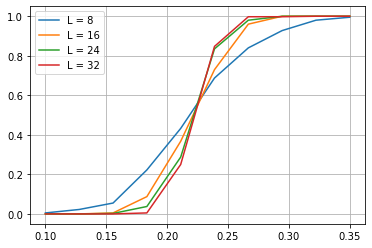

In [144]:
plt.figure()
for i_L, L in enumerate(L_list):
    plt.plot(p_list,prob_y[i_L,:],"-", color = "C%d" % i_L, label="L = %d" % L)
    # plt.plot(p_list,prob_y[i_L,:],"--", color = "C%d" % i_L)
plt.legend()
# plt.yscale("log")
plt.grid()
plt.show()

0 1


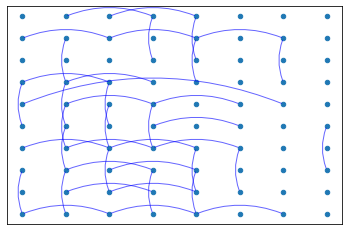

In [123]:
# square lattice
l = 2
r1 = 8
r2 = r1

# loss error
prob_l = 0. # loss error probability
prob_l_nn = 0.3

error_loss = np.random.rand(l*r1*r2) 
loss_inds = np.argwhere(error_loss < prob_l)[:,0]
remain_inds = np.argwhere(error_loss >= prob_l)[:,0]

error_loss_nn = np.random.rand(l*r1*r2) 
loss_inds_nn = np.argwhere(error_loss_nn < prob_l_nn)[:,0]
remain_inds_nn = np.argwhere(error_loss_nn >= prob_l_nn)[:,0]

Gy = nx.Graph()
for i in np.arange(r1*(r2+2)):
    Gy.add_node(i, pos = (i%r1, int(i/r1)))
Gx = nx.Graph()
for i in np.arange(r2*(r1+1)):
    Gx.add_node(i, pos = (i%(r1+1), int(i/(r1+1))))

for i2 in range(r2):
    for i1 in range(r1):
        ind1 = i2*r1+ i1
        ind2 = i2*r1 + ((i1+1)%r1)
        # cylinder along y
        if 2*ind1 in loss_inds:
            Gy.add_edge(ind1,ind2)
            if i2 ==0:
                Gy.add_edge(r1*r2+ind1,r1*r2+ind2)
        if 2*ind1+1 in loss_inds:
            Gy.add_edge(ind1,ind1+r1)
            if i2 ==0:
                Gy.add_edge(r1*r2+ind1,r1*r2+ind1+r1)
                
        ind1 = i2*r1+ i1
        ind2 = i2*r1 + ((i1+2)%r1)
        # cylinder along y
        if 2*ind1 in loss_inds_nn:
            Gy.add_edge(ind1,ind2)
            if i2 ==0 or i2 ==1:
                Gy.add_edge(r1*r2+ind1,r1*r2+ind2)
        if 2*ind1+1 in loss_inds_nn and i2< r2:
            Gy.add_edge(ind1,ind1+2*r1)

        # cylinder along x
        ind2 = ((i2+1)%r2)*r1 + i1
        i2_g = ((i2+1)%r2)*(r1+1) + i1
        i1_g = i2*(r1+1)+ i1
        if 2*ind1+1 in loss_inds:
            Gx.add_edge(i1_g,i2_g)
            if i1 == 0 :
                Gx.add_edge(i1_g+r1,i2_g+r1)                 
        if 2*ind1 in loss_inds:
            Gx.add_edge(i1_g,i1_g+1)

        ind2 = ((i2+2)%r2)*r1 + i1
        i2_g = ((i2+2)%r2)*(r1+1) + i1
        i1_g = i2*(r1+1)+ i1
        if 2*ind1+1 in loss_inds_nn:
            Gx.add_edge(i1_g,i2_g)
            # if i1 == 0 :
            #     Gx.add_edge(i1_g+2*r1,i2_g+2*r1)                 
        if 2*ind1 in loss_inds_nn and i1< r1-1:
            Gx.add_edge(i1_g,i1_g+2)

first_row = np.arange(r1)
last_row = np.arange(r2*r1,(r2+1)*r1)
path_y = 0
for i_first in first_row:
    for i_last in last_row:
        if nx.has_path(Gy,i_first,i_last):
            if (i_first - i_last )%r1 ==0:
                path_y = 1
                break

first_col = np.arange(0,(r2-1)*(r1+1)+1,r1+1)
last_col = np.arange(r1,r2*(r1+1)+1,r1+1)
path_x = 0
for i_first in first_col:
    for i_last in last_col:
        if nx.has_path(Gx,i_first,i_last):
            if int(i_first/(r1+1)) == int(i_last/(r1+1)):
                path_x = 1
                break

print(path_x,path_y)

for i in range(len(loss_inds)):
    latt_pos = int(loss_inds[i]/2)
    if loss_inds[i] % 2 == 0 :
        ry = int(latt_pos/r1) 
        rx = (latt_pos%r1) 
        plt.plot([rx,rx+1],[ry,ry],color="k")
    else:
        ry = int(latt_pos/r1)  
        rx = (latt_pos%r1)   
        plt.plot([rx,rx],[ry,ry+1],color="k")
plt.show()

# for e in Gy.edges():
#     p1, p2 = e
#     print(e)
#     x1 = p1 % r1
#     y1 = int(p1/r1)
#     x2 = p2 % r1
#     y2 = int(p2/r1)
#     if x2-x1 ==0 or np.abs(x2-x1)< r1-1:
#         plt.plot([x1,x2],[y1,y2],"r--")
#     else:
#         plt.plot([r1-1,r1],[y1,y2],"r--")

# for e in Gx.edges():
#     p1, p2 = e
#     x1 = p1 % (r1+1)
#     y1 = int(p1/(r1+1))
#     x2 = p2 % (r1+1)
#     y2 = int(p2/(r1+1))
#     if y2-y1 ==0 or np.abs(y2-y1)< r2-1:
#         plt.plot([x1,x2],[y1,y2],"r--")
#     else:
#         plt.plot([x1,x2],[r2-1,r2],"r--")

def G_plotter(G):
    ax=plt.gca()
    pos = nx.get_node_attributes(G,'pos')  # positions for all nodes
    nx.draw_networkx_nodes(G, nx.get_node_attributes(G,'pos'), node_size=20)

    for edge in G.edges():
        source, target = edge
        rad = 0.2
        arrowprops=dict(arrowstyle="-",
                        color='blue',
                        connectionstyle=f"arc3,rad={rad}",
                        linestyle= '-',
                        alpha=0.6)
        ax.annotate("",
                    xy=pos[source],
                    xytext=pos[target],
                    arrowprops=arrowprops
                   )
    # nx.draw(G, nx.get_node_attributes(G,'pos'), with_labels=True, font_weight='bold')
    plt.show()

G_plotter(Gy)
# G_plotter(Gx)

# plt.xticks(np.arange(0,r1+1.))
# plt.yticks(np.arange(0,r2+1.))
# plt.grid()
# plt.show()

# nx.draw(Gx, with_labels=True, font_weight='bold')
# plt.show()

In [22]:
# square lattice
l = 2
r1 = 8
r2 = r1

 # loss error
prob_l = 0.4 # loss error probability
error_loss = np.random.rand(l*r1*r2) 
loss_inds = np.argwhere(error_loss < prob_l)[:,0]
remain_inds = np.argwhere(error_loss >= prob_l)[:,0]

Gy = nx.Graph()
Gy.add_nodes_from(np.arange(r1*r2))
Gx = nx.Graph()
Gx.add_nodes_from(np.arange(r1*r2))


for i2 in range(r2):
    for i1 in range(r1):
        ind1 = i2*r1+ i1
        ind2 = i2*r1 + ((i1+1)%r1)
        # cylinder along y
        if 2*ind1 in loss_inds:
            Gy.add_edge(ind1,ind2)
        if ind1 +r1 < r1*r2 and 2*ind1+1 in loss_inds:
            Gy.add_edge(ind1,ind1+r1)
        # cylinder along x
        ind2 = ((i2+1)%r2)*r1 + i1
        if 2*ind1+1 in loss_inds:
            Gx.add_edge(ind1,ind2)
        if i1+1 < r1 and 2*ind1 in loss_inds:
            Gx.add_edge(ind1,ind1+1)
          
# nx.draw(Gx, with_labels=True, font_weight='bold')
# plt.show()
# nx.draw(Gy, with_labels=True, font_weight='bold')
# plt.show()
# G.edges()
first_row = np.arange(r1)
last_row = np.arange((r2-1)*r1,r2*r1)
path_y = False
for i_first in first_row:
    for i_last in last_row:
        if nx.has_path(Gy,i_first,i_last):
            if 2*i_last+1 in loss_inds or (i_first - i_last )%r1 ==0:
                path_y = True
                break

first_col = np.arange(0,(r2-1)*r1+1,r1)
last_col = np.arange(r1-1,r2*r1+1,r1)
path_x = False
for i_first in first_col:
    for i_last in last_col:
        if nx.has_path(Gx,i_first,i_last):
            if 2*i_last in loss_inds or int(i_first/r1) == int(i_last/r1):
                path_x = True
                break

print(path_y,path_x)

plt.figure(1)
for i in range(len(loss_inds)):
    ind1 = int(loss_inds[i]/2)
    if loss_inds[i] % 2 == 0 :
        ind2 = int(int(loss_inds[i]/2)/r1)*r1 + (((int(loss_inds[i]/2)%r1)+1)%r1)
        # if not Gy.has_edge(ind1,ind2):
        #     print(ind1,ind2)
        assert Gy.has_edge(ind1,ind2)
        ind2 = ind1 + 1
        if (int(loss_inds[i]/2)%r1)+1 < r1:
            assert Gx.has_edge(ind1,ind2)     
    else:
        ind2 = ind1 + r1
        if ind2 < r1*r2:
            # if not Gy.has_edge(ind1,ind2):
                # print(ind1,ind2,"v")
            assert Gy.has_edge(ind1,ind2)
        ind2 = ((int(int(loss_inds[i]/2)/r1)+1)%r2)*r1 + (int(loss_inds[i]/2)%r1)
        assert Gx.has_edge(ind1,ind2)
            
    latt_pos = int(loss_inds[i]/2)
    if loss_inds[i] % 2 == 0 :
        ry = int(latt_pos/r1) 
        rx = (latt_pos%r1) 
        plt.plot([rx,rx+1],[ry,ry],color="k")
    else:
        ry = int(latt_pos/r1)  
        rx = (latt_pos%r1)   
        plt.plot([rx,rx],[ry,ry+1],color="k")

plt.xticks(np.arange(0,r1+1.))
plt.yticks(np.arange(0,r2+1.))
plt.grid()
plt.show()

False False


AssertionError: 

<Figure size 432x288 with 0 Axes>

In [ ]:
# import packages
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import percolate
from pprint import pprint

# # configure plotting colors
# colors = [
#     '#0e5a94',
#     '#eb008a',
#     '#37b349',
#     '#f29333',
#     '#00aabb',
#     '#b31e8d',
#     '#f8ca12',
#     '#7a2d00',
# ]
# mpl.rcParams['axes.color_cycle'] = colors

In [2]:
# number of parallel runs (sample states to evolve)
runs = 4
# system sizes
grid_ls = [3, 10, 32]
# generate the square grid graphs with spanning cluster detection
# for all system sizes
grid_graphs = [ percolate.spanning_2d_grid(l) for l in grid_ls ]
# compute the single-run cluster statistics for all sample states
# and system sizes
grid_single_runs = [
    [ percolate.single_run_arrays(graph=grid_graph) for _ in range(runs) ]
    for grid_graph in grid_graphs
]
# plot
fig, axes = plt.subplots(
    nrows=len(grid_ls), ncols=5, squeeze=True, figsize=(8.0, 6.0)
)
for l_index, l in enumerate(grid_ls):
    for single_run in grid_single_runs[l_index]:
        axes[l_index, 0].plot(
            single_run['has_spanning_cluster'], lw=4, alpha=0.7, rasterized=True
        )
        axes[l_index, 1].plot(
            single_run['max_cluster_size'], lw=4, alpha=0.7, rasterized=True
        )
        for k in range(3):
            axes[l_index, k + 2].plot(
                single_run['moments'][k], lw=4, alpha=0.7, rasterized=True
            )
    axes[l_index, 0].set_ylabel(r'L={}'.format(l))

    for ax in axes[l_index, :]:
        num_edges = grid_single_runs[l_index][0]['M']
        ax.set_xlim(xmax=num_edges)
        ax.set_xticks(np.linspace(0, num_edges, num=3))
        ax.set_xticklabels(['0', '', num_edges])
        ax.set_yticks(np.linspace(0, ax.get_ylim()[1], num=3))

    axes[l_index, 0].set_yticks([0, 1])

axes[0, 0].set_title(r'spanning?')
axes[0, 1].set_title(r'largest cluster')
for k in range(3):
    axes[0, k + 2].set_title(r'$M_{}$'.format(k))

for ax in axes[-1, :]:
    ax.set_xlabel(r'$n$')

plt.tight_layout(0)
plt.show()

KeyError: 0